In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
#Reading as pandas dataframe
data = pd.read_csv('electricity_demand.csv')

In [5]:
#Viewing the data rows
data.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [6]:
#Encoding the categorical features in our data
data [['school_day', 'holiday']] = data[['school_day', 'holiday']].apply(LabelEncoder().fit_transform)

In [7]:
#Getting the correlation matrix
data.corr()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
demand,1.000000,0.217538,0.971377,0.215038,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257406,-0.064609,0.123030,-0.247683
RRP,0.217538,1.000000,0.220856,0.999821,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061808,-0.028642,-0.005014,-0.030963
demand_pos_RRP,0.971377,0.220856,1.000000,0.214628,-0.409102,0.120054,-0.416573,-0.147020,-0.068146,-0.229749,-0.069696,0.136983,-0.234809
RRP_positive,0.215038,0.999821,0.214628,1.000000,-0.062631,0.029455,-0.061968,0.071052,0.165663,0.061311,-0.027860,-0.006134,-0.030697
demand_neg_RRP,-0.180638,-0.078815,-0.409102,-0.062631,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037467,0.040387,-0.094577,0.020787
RRP_negative,0.057854,0.038931,0.120054,0.029455,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001654,-0.020794,0.007775,-0.004092
frac_at_neg_RRP,-0.189839,-0.077955,-0.416573,-0.061968,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036701,0.038527,-0.096948,0.025606
min_temperature,-0.156118,0.070619,-0.147020,0.071052,0.009030,-0.077248,0.008859,1.000000,0.705433,0.376261,-0.003050,-0.082904,0.066620
max_temperature,-0.073216,0.165484,-0.068146,0.165663,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.598995,-0.155392,-0.092532,0.042487
solar_exposure,-0.257406,0.061808,-0.229749,0.061311,-0.037467,0.001654,-0.036701,0.376261,0.598995,1.000000,-0.123568,-0.095447,0.045224


*Since the column demand and demand_pos_RRP have similar values, to avoid redundancy we need to remove the demand_pos_RRP column before building our model, as the demand is our dependent variable and we do not want data leakage in our model. Similarly, we can see that the RRP and the RRP_positive is highly correlated (~0.99), we need to remove one of these features before building our model. As the features RRP is slighly higher correlated with the depedent variable demand, we drop the demand_pos_RRP column.* 

In [8]:
data.drop(columns = ['demand_pos_RRP', 'RRP_positive'], inplace = True)

In [9]:
#Check for NA values
data.isnull().sum(axis = 0)

date               0
demand             0
RRP                0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

*As the columns solar_exposure and rainfall have NA values, we can replace the NA values with the average values of the respective columns.*

In [10]:
#Filing NA values with average values for respective columns  
data.fillna(data.mean(), inplace = True)

In [11]:
#Validating the changes
data.isnull().sum(axis = 0)

date               0
demand             0
RRP                0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

In [12]:
#Correlation plot
rs = np.random.RandomState(0)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,demand,RRP,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
demand,1.000000,0.217538,-0.180638,0.057854,-0.189839,-0.156118,-0.073216,-0.257364,-0.064555,0.123030,-0.247683
RRP,0.217538,1.000000,-0.078815,0.038931,-0.077955,0.070619,0.165484,0.061808,-0.028641,-0.005014,-0.030963
demand_neg_RRP,-0.180638,-0.078815,1.000000,-0.274847,0.995590,0.009030,0.000914,-0.037467,0.040385,-0.094577,0.020787
RRP_negative,0.057854,0.038931,-0.274847,1.000000,-0.258065,-0.077248,-0.033255,0.001654,-0.020794,0.007775,-0.004092
frac_at_neg_RRP,-0.189839,-0.077955,0.995590,-0.258065,1.000000,0.008859,-0.001174,-0.036700,0.038526,-0.096948,0.025606
min_temperature,-0.156118,0.070619,0.009030,-0.077248,0.008859,1.000000,0.705433,0.375967,-0.003048,-0.082904,0.066620
max_temperature,-0.073216,0.165484,0.000914,-0.033255,-0.001174,0.705433,1.000000,0.598771,-0.155333,-0.092532,0.042487
solar_exposure,-0.257364,0.061808,-0.037467,0.001654,-0.036700,0.375967,0.598771,1.000000,-0.123504,-0.095436,0.045223
rainfall,-0.064555,-0.028641,0.040385,-0.020794,0.038526,-0.003048,-0.155333,-0.123504,1.000000,-0.013983,-0.015024
school_day,0.123030,-0.005014,-0.094577,0.007775,-0.096948,-0.082904,-0.092532,-0.095436,-0.013983,1.000000,-0.170251


#Demand feature

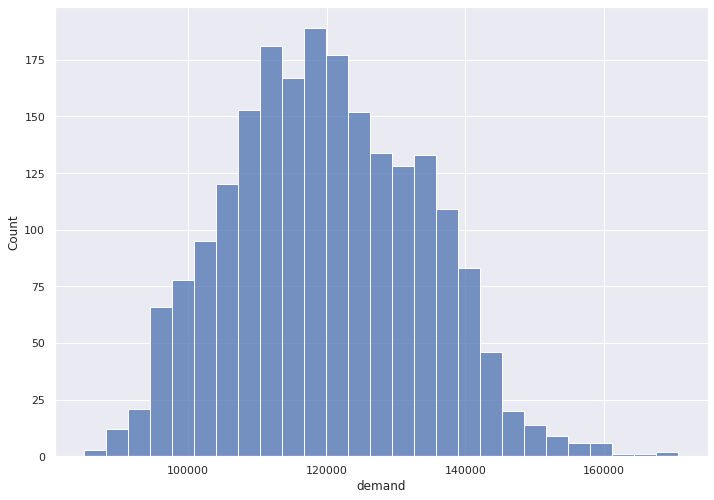

In [23]:
#Histogram of the dependent variable
sns.histplot(data=data, x="demand")

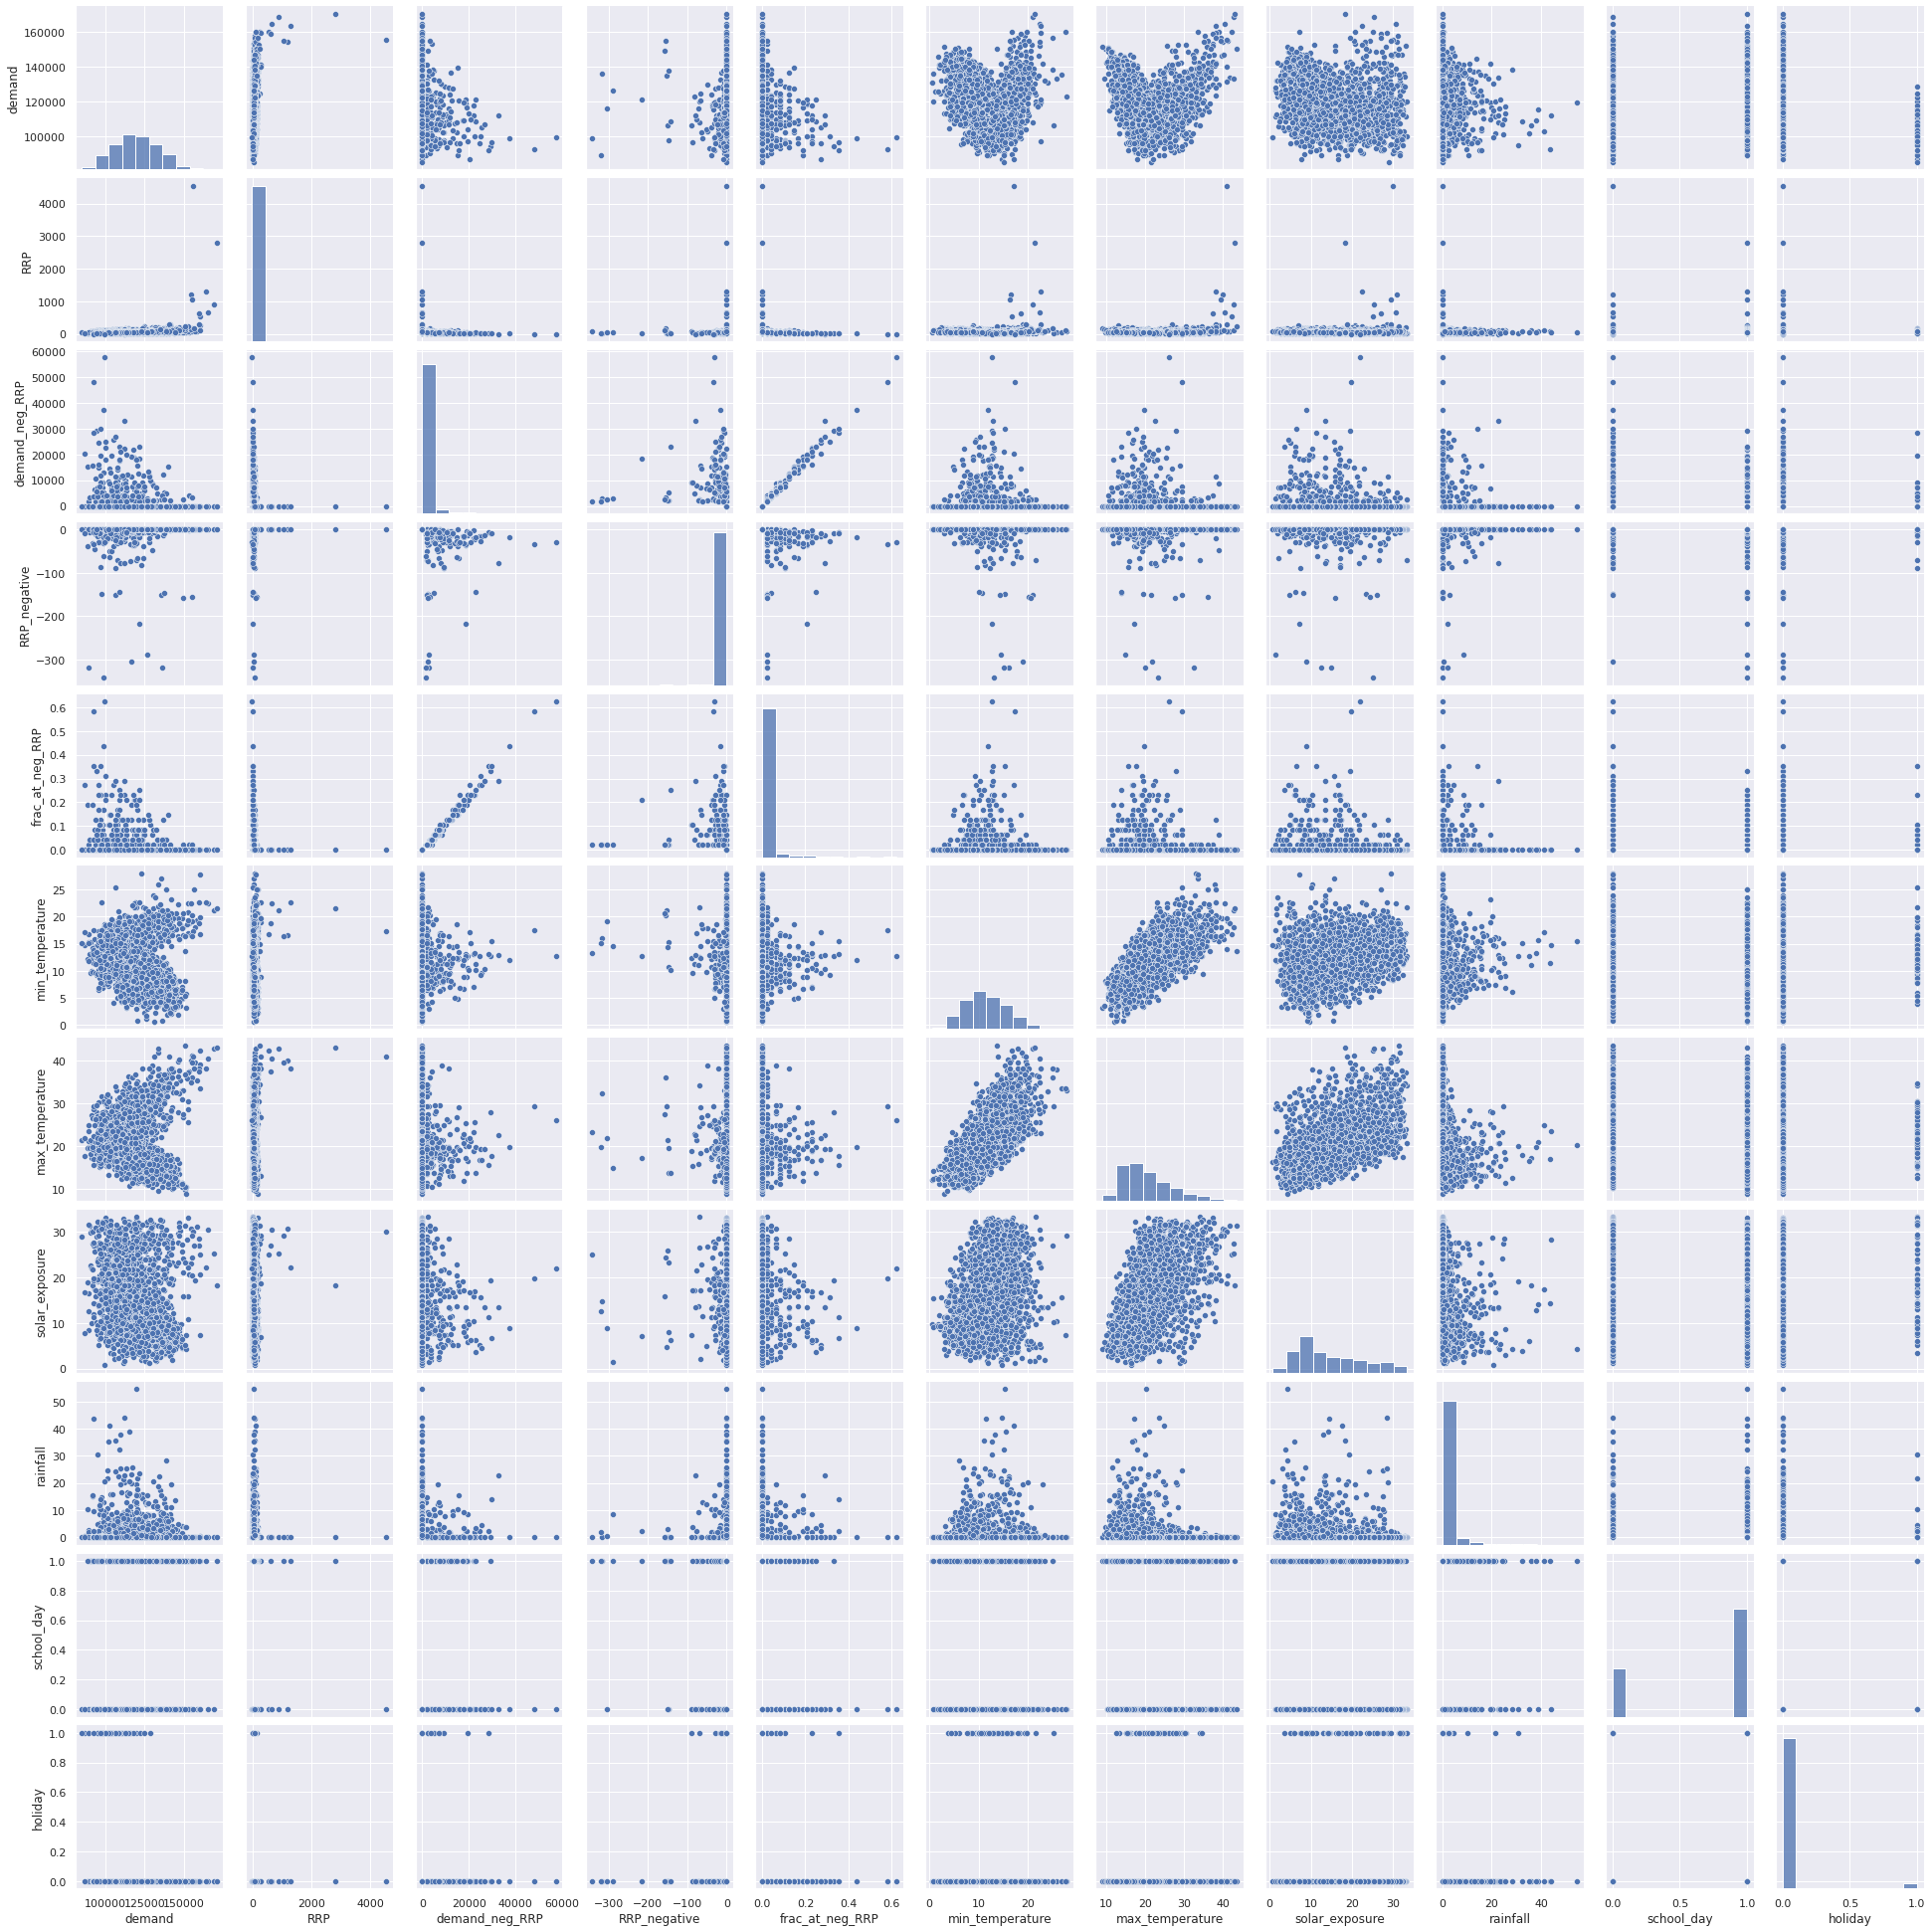

In [24]:
#Pairplot of the features to understand the trend
sns.pairplot(data, diag_kws={'bins': 10})

In [32]:
#Splitting into indepedent features and dependent features.
x = data[[ 'RRP', 'demand_neg_RRP', 'RRP_negative',
       'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday']]
y = data['demand']

Relevant features using ANOVA and mutual info analysis. 

In [47]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

xy = SelectKBest(f_regression, k = 'all')
xy.fit(x, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7fac60f52440>)

In [48]:
for i in range(10):
  print("The p-value for the variable", x.columns[i],"is", round((xy.pvalues_[i]),4))

The p-value for the variable RRP is 0.0
The p-value for the variable demand_neg_RRP is 0.0
The p-value for the variable RRP_negative is 0.0079
The p-value for the variable frac_at_neg_RRP is 0.0
The p-value for the variable min_temperature is 0.0
The p-value for the variable max_temperature is 0.0008
The p-value for the variable solar_exposure is 0.0
The p-value for the variable rainfall is 0.003
The p-value for the variable school_day is 0.0
The p-value for the variable holiday is 0.0


In [49]:
for i in range(10):
  print("The scores for the variable", x.columns[i],"is", round((xy.scores_[i]),4))

The scores for the variable RRP is 104.5132
The scores for the variable demand_neg_RRP is 70.9692
The scores for the variable RRP_negative is 7.0658
The scores for the variable frac_at_neg_RRP is 78.6602
The scores for the variable min_temperature is 52.5617
The scores for the variable max_temperature is 11.3393
The scores for the variable solar_exposure is 149.2471
The scores for the variable rainfall is 8.8047
The scores for the variable school_day is 32.3363
The scores for the variable holiday is 137.5099


*With 5% level of significance, we determine that using the ANOVA feature selection, we determine that all variables are relevant in predicting the electricity demand. However, the score for the RRP_negative and rainfall is very low.*



